In [1]:
# Here we take care of paths.

from pathlib import Path
import os
print('Starting path:' + os.getcwd())
if os.getcwd()[-16:] == 'image-to-tex-OCR':
    pass
else:
    PATH = Path().resolve().parents[0]
    os.chdir(PATH)

# make sure you are in Paragraph_to_Tex folder
print('Current path:' + os.getcwd())

Starting path:/home/resisistancerow_909/image-to-tex-OCR/Jupyter_Notebooks
Current path:/home/resisistancerow_909/image-to-tex-OCR


In [2]:
from Data.Data_Module import Data_Module
from Models.Printed_Tex_Transformer import ResNetTransformer
from Lightning_Models.Printed_Tex_Lit_Model import LitResNetTransformer
import numpy as np
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from PIL import Image
import torch
from pytorch_lightning.loggers import TensorBoardLogger
from torchvision import transforms
from PIL import Image
from IPython.display import display, Math

dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
torch.cuda.is_available()

True

In [3]:
# Generate Data Module by uploading images and formulas
# images need to be in the folder Data/Data_Bank/generated_png_images
# formulas need to be in Data/Data_Bank/final_png_formulas.txt
# image filenames need to be in Data/Data_Bank/corresponding_png_images.txt

dataset = Data_Module(stage = 'fit',
                 set_max_label_length = 128,
                 number_png_images_to_use_in_dataset=250*1000,
                 labels_transform='default',
                image_transform_name ='alb',
                 train_val_fraction = 0.999,
                   vocabulary_path = 'Data/Data_Bank/230k.json',
                load_vocabulary = True,


                 batch_size = 128,
                num_workers = 8,
                data_on_gpu = True,
                )


In [5]:
print( 
    'Vocabulary size:',len(dataset.vocabulary),
    '\nMax label length:', dataset.max_label_length,
    "\nStart <S> goes to index ",dataset.vocabulary['<S>'],
      "\nEnd <E> goes to index ",dataset.vocabulary['<E>'],
      "\nPadding <P> goes to index ",dataset.vocabulary['<P>'],
)

Vocabulary size: 579 
Max label length: 130 
Start <S> goes to index  0 
End <E> goes to index  1 
Padding <P> goes to index  2


In [6]:
model = ResNetTransformer(dataset=dataset).to(dev)

/home/resisistancerow_909/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/resisistancerow_909/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [7]:
model.load_state_dict(torch.load(("Models_Parameters_Log/Printed1.pth"), map_location=torch.device('cpu')))


<All keys matched successfully>

In [8]:
# Helper Function to convert prediction labels to strings
def token_to_strings(tokens):
    mapping = dataset.vocabulary
    inverse_mapping =dataset.inverse_vocabulary
    s=''
    if tokens.shape[0] ==1:
        tokens = tokens[0]
    for number in tokens:
        
        letter = inverse_mapping[number.item()]
        s= s +" " + str(letter)
    return s

/home/resisistancerow_909/anaconda3/lib/python3.9/site-packages/albumentations/augmentations/transforms.py:1414: UserWarning: The image is already gray.
  warnings.warn("The image is already gray.")


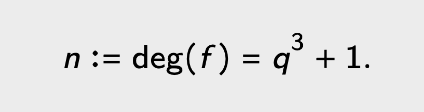

None

Predicted formula:
 <S> D \, : = \, \mathrm { d } \, { \bf e } { \bf Z } \left( \, f \, \right) \, = \, { \bf G } ^ { 3 } \, + \, { \bf 1 } . <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [9]:
### ALB
my_image_path= "Jupyter_Notebooks/test_photos/my_image.png"
my_image = Image.open(my_image_path).convert("L") 
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']
print(display(my_image))
print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))


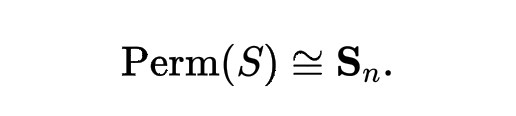

None

Predicted formula:
 <S> { \bf P e r m } \left( S \right) \cong { \bf S } _ { \eta } . <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [10]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/zarhin.png"
my_image = Image.open(my_image_path).convert("L") 
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']
print(display(my_image))
print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

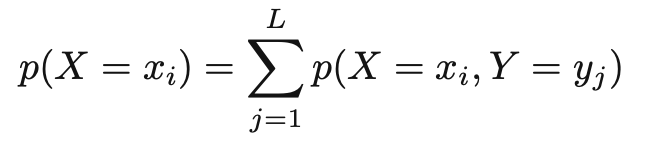

None

Predicted formula:
 <S> P ( X \, - \, x _ { i } ) \, = \, \sum _ { j = 1 } ^ { L } p ( X \, - \, x _ { i } , Y \, - \, y _ { j } ) <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [11]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/screenshot_1.png"
my_image = Image.open(my_image_path).convert("L") 
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']
print(display(my_image))
print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

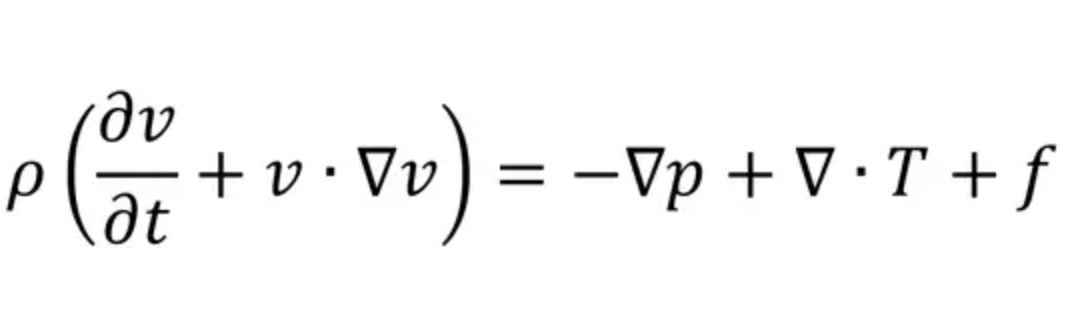

None

Predicted formula:
 <S> \rho \left( \frac { \partial \nu } { \partial \, t } + \nu \cdot \nabla \nu \right) = - \nabla p \cdot T + \nabla \cdot T <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [12]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/screenshot_3.png"
my_image = Image.open(my_image_path).convert("L") 
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']
print(display(my_image))
print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

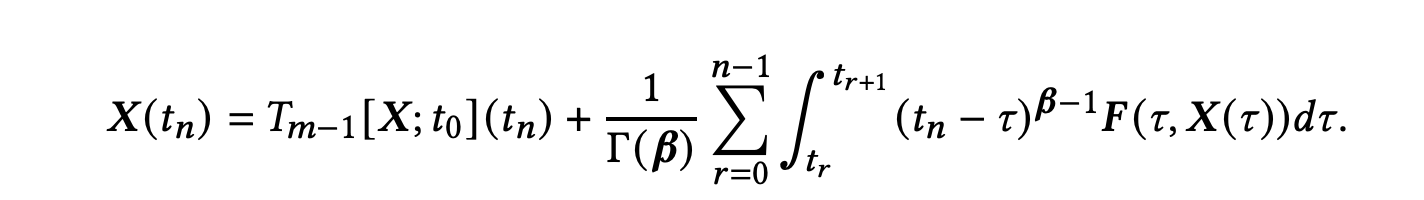

None

Predicted formula:
 <S> X ( l _ { R } ) \sim T _ { m = 1 } [ X ; l _ { 0 } ] ( l _ { n } ) + \frac { 1 } { \Gamma ( \theta ) } \sum _ { \ell = 0 } ^ { n - 1 } \int _ { \ell _ { n } ^ { t } s _ { k } } ( l _ { n } - r ) ^ { \theta - 1 } F ( \tau , X ( \tau ) ) d \tau . <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [13]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/Screen Shot_14.png"
my_image = Image.open(my_image_path).convert("L") 
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']
print(display(my_image))
print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

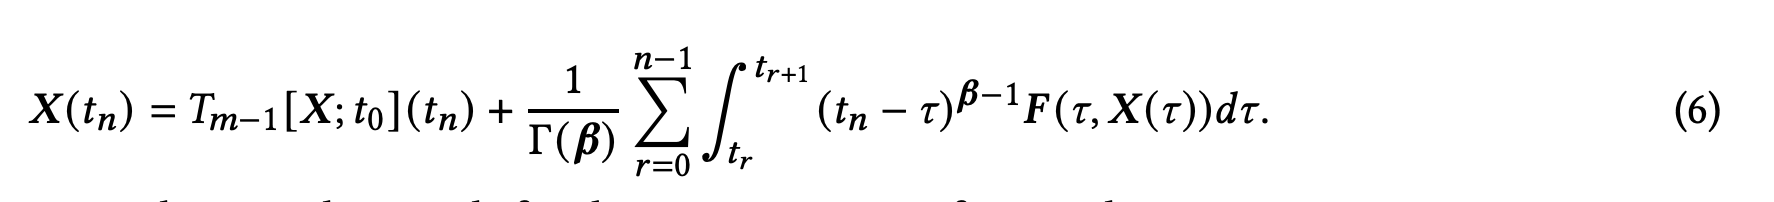

None

Predicted formula:
 <S> \chi ( t _ { a } ) = T _ { R a - 1 } ( X _ { b } t _ { b } ) + \frac { 1 } { \Gamma ( \theta ) } \sum _ { e = 0 } ^ { n - 1 } \int _ { H _ { e } ^ { r r a b } ( t _ { a } - \tau ) ^ { p - 1 } F ( \tau _ { c } X ( \tau ) ) d x . \tag { G } <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [14]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/Screen Shot_13.png"
my_image = Image.open(my_image_path).convert("L") 
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']
print(display(my_image))
print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

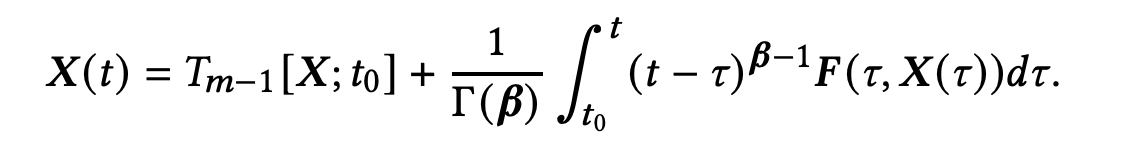

None

Predicted formula:
 <S> X ( t ) \, = \, T _ { R 2 - 1 } ( X ; l _ { 0 } l ) + \frac { 1 } { \Gamma ( \not \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \! \!


<IPython.core.display.Math object>

None


In [15]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/Screen Shot_15.png"
my_image = Image.open(my_image_path).convert("L") 
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']
print(display(my_image))
print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))